Ref: https://data-challenge.lighthouselabs.ca/challenge/20

### **Day 20: *Combining Our Knowledge***

After figuring out that Seattle has the best connection with Vancouver, Dot hopped on a flight heading north and east. The plane bounded over the endless Pacific until it began its descent over the Puget Sound, eventually landing in Washington State among the Space Needle and the tall office buildings where tech companies worked. What a different environment than Hawaii! Dot had some time to kill before they boarded their connection to Vancouver. Instead of wasting it in the airport, they checked out the city. Dot had never been to Seattle before and wanted to visit the Museum of Pop Culture for the first time. 

The building rose up strangely and majestically before Dot’s eyes, resembling a quilt of colourful, hallucinatory sheets of metal blowing in the wind. Dot had never seen anything like it. Inside, they strolled through the exhibits paying tribute to humanity’s music, art, music, and video games. Dot was inspired by how much beauty and culture people had contributed through the years. All this reflecting on the past made Dot reflect on theirs – specifically, what they’d done over the past weeks. Dot had visited many different cultures across the earth, taking in the sights and sounds of cities in the Americas, Europe, Asia, and Australia. It had been incredible to see how different but similar societies across the world were. As they rode back to the airport to make their connecting flight, Dot smiled with happiness as they sifted through their memories. Will you join Dot in reminiscing as you review what you’ve learned over the past few weeks? 


### Tutorial

Through the past 19 days, we've gone over the fundamentals of Python, Pandas, SQL and Matplotlib. With these technologies combined, you're well on your way to doing great data science and analytics work. In today's challenge, we'll be integrating aspects from all of the previous challenges, combining them to do a data analysis of the world cities we’ve visited.

### Challenge

Pull the data from the **worldcities** table in the **world.db** database to the pandas DataFrame, then answer the following questions:

1. **Using a Matplotlib histogram, visualize the distribution of population across all cities. What do you observe?**
2. **Create a bar chart with the population of the top 10 most populated countries. Which country is most populated?**


#### Stretch Questions

- What is the most populated city Dot visited in the last three weeks?
- What is the difference in population between the most populated city and the least populated city?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
conn = sqlite3.connect("world.db")

In [3]:
# note: there are cities with the same name, even within the same country
# but for simplicity we will avoid making the distinction as it's not 
# necessary for these challenge questions

df = pd.read_sql("""SELECT * FROM worldcities""", conn, index_col=['city_ascii', 'country'])
df.head()

,,lat,lng,iso2,iso3,capital,population
city_ascii,country,,,,,,
Tokyo,Japan,35.6897,139.6922,JP,JPN,primary,37977000.0
Jakarta,Indonesia,-6.2146,106.8451,ID,IDN,primary,34540000.0
Delhi,India,28.6600,77.2300,IN,IND,admin,29617000.0
Mumbai,India,18.9667,72.8333,IN,IND,admin,23355000.0
Manila,Philippines,14.6000,120.9833,PH,PHL,primary,23088000.0


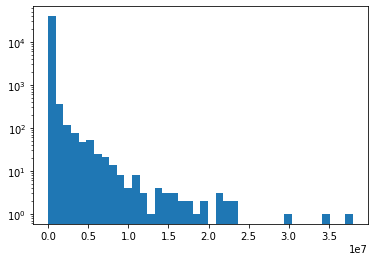

In [4]:
# Question 1

plt.figure()
plt.hist(df.population, log=True, bins=40)
plt.show()

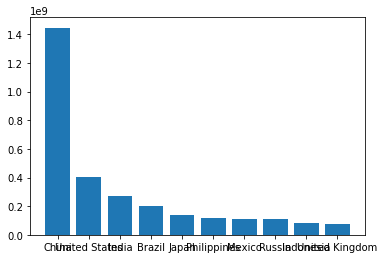

In [5]:
# Question 2

df_largest_countries = df.groupby('country')['population'].sum().nlargest(10)

plt.figure()
plt.bar(x=df_largest_countries.keys(), height=df_largest_countries.values)
plt.show()

In [6]:
# Stretch question 1

df_visited = df.loc[[
    # Days 1-4
    ('Vancouver', 'Canada'),
    ('Toronto', 'Canada'),
    ('Munich', 'Germany'),
    # Day 5-6
    ('London', 'United Kingdom'),
    # Day 7
    ('Barcelona', 'Spain'),
    # Day 8
    ('Paris', 'France'),
    # Day 9
    ('Florence', 'Italy'),
    # Day 10-11
    ('Dubai', 'United Arab Emirates'),
    # Day 12
    ('Perth', 'Australia'),
    # Day 13
    ('Melbourne', 'Australia'),
    # Day 14: @ new zealand countryside
    # Day 15-16: @ mount everest
    # Day 17
    ('Tokyo', 'Japan'),
    # Day 18
    ('Bangkok', 'Thailand'),
    # Day 19
    ('Honolulu', 'United States'),
    # Day 20
    ('Seattle', 'United States'),
]]

df_visited.population.agg(['idxmax', 'max'])

idxmax    (Tokyo, Japan)
max           37977000.0
Name: population, dtype: object

In [7]:
# Stretch question 2

df_visited.population.max() - df_visited.population.min()

37596052.0

### Answer

1. The majority of cities has population smaller than 1 million
2. China

![Challenge 20 Solved](https://data-challenge.lighthouselabs.ca/img/badges/badge20@72x.png)